In [1]:
# display, transform, read, split ...
#기존 모델에 일정 에포크 이후 파인튜닝 (20번째부터)
import numpy as np
import cv2 as cv
import tempfile
import os
import splitfolders
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
os.environ["TF_XLA_FLAGS"] = "--tf_xla_enable_xla_devices=false"


# image processing
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

# model / neural network
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.callbacks import ReduceLROnPlateau,EarlyStopping, Callback
from tensorflow.python.client import device_lib

#cutmix
from tensorflow.keras.utils import Sequence

# GPU 사용
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
# CPU 사용
# os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

# # CPU, GPU 사용 가능 여부 print
# print(device_lib.list_local_devices())

2025-04-02 02:11:28.552942: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-02 02:11:28.581155: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


### model load


In [29]:
model = tf.keras.models.load_model('/home/juha/Desktop/S12P21C201/src/AI/models/50model/QAT_50model_mixed')

model.summary()


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 image_input (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 tf.__operators__.getitem (  (None, 224, 224, 3)       0         
 SlicingOpLambda)                                                
                                                                 
 tf.nn.bias_add (TFOpLambda  (None, 224, 224, 3)       0         
 )                                                               
                                                                 
 model (Functional)          (None, 26)                26384858  
                                                                 
Total params: 26384858 (100.65 MB)
Trainable params: 10679386 (40.74 MB)
Non-trainable params: 15705472 (59.91 MB)
_________________________________________________________________


### 테스트 이미지 불러오기

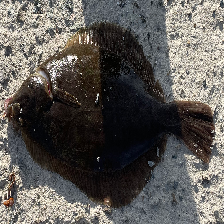

In [67]:
test1_img = tf.keras.preprocessing.image.load_img('/home/juha/Desktop/S12P21C201/src/AI/1-11.png', 
                                            target_size=(224, 224)) 
img1_array = tf.keras.preprocessing.image.img_to_array(test1_img)
img1_array = np.array([img1_array]) 
#img1_array = preprocess_input(img1_array)
test1_img

In [68]:
class_names = ['학공치', '문절망둑', '광어', '복섬', '문어', '주꾸미', '노래미', '무늬오징어', '농어', '갈치', '붕장어', '고등어', '독가시치', '감성돔', '삼치', '성대', '양태', '갑오징어', '전갱이', '망상어', '숭어', '볼락', '우럭', '돌돔', '벵에돔', '참돔']

# generate predictions for samples
predictions = model.predict(img1_array)
print(predictions)

# generate argmax for predictions
class_id = np.argmax(predictions, axis = 1)
print(class_id)

# transform classes number into classes name|
print("모델 예측: ", class_names[class_id.item()])


1/1 [==============================] - 0s 17ms/step
[[2.14502506e-06 6.44891043e-05 9.80253577e-01 4.78182264e-05
  7.24839570e-04 5.17231601e-05 7.86941778e-03 6.34551805e-04
  1.38443182e-04 1.17637746e-05 4.04445236e-05 2.55094142e-06
  4.10511333e-04 9.06385307e-04 2.24880860e-05 3.50436312e-04
  3.22342082e-03 1.28158799e-03 1.25827675e-04 1.35383906e-03
  4.42584242e-05 1.76165340e-04 1.48226309e-03 1.17207914e-04
  3.29625298e-04 3.34326003e-04]]
[2]
모델 예측:  광어


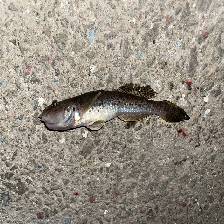

In [57]:
test2_img = tf.keras.preprocessing.image.load_img('/home/juha/Desktop/S12P21C201/src/AI/1.png', 
                                            target_size=(224, 224))
img2_array = tf.keras.preprocessing.image.img_to_array(test2_img)
img2_array = np.array([img2_array])

test2_img

In [58]:

# generate predictions for samples
predictions = model.predict(img2_array)
print("Class id 별 확률: \n",predictions)

# generate argmax for predictions
class_id = np.argmax(predictions, axis = 1)
print("Class id: ", class_id)

# transform classes number into classes name
print("모델 예측: ", class_names[class_id.item()])

1/1 [==============================] - 0s 15ms/step
Class id 별 확률: 
 [[1.4629011e-04 2.6305479e-03 4.8120008e-04 7.4651936e-04 3.3062210e-05
  8.7447452e-06 9.8760623e-01 2.9777567e-04 3.8895349e-04 9.1421156e-05
  2.9479695e-04 1.4860589e-04 9.8524301e-04 6.8608066e-04 6.9792273e-05
  2.1591141e-04 2.2769447e-03 5.1553696e-05 2.2818604e-04 6.1950076e-04
  6.3072031e-05 3.0771072e-04 9.7763445e-04 2.7383081e-04 1.2899228e-04
  2.4150143e-04]]
Class id:  [6]
모델 예측:  노래미
